https://colab.research.google.com/drive/1GK_JQZz2sRX3Yc-0mrwbtOKH84r-XnKT

In [0]:
!wget https://www.dropbox.com/s/6fab2uqje8e5bf5/stock_data.csv

--2019-09-18 05:16:37--  https://www.dropbox.com/s/6fab2uqje8e5bf5/stock_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6fab2uqje8e5bf5/stock_data.csv [following]
--2019-09-18 05:16:42--  https://www.dropbox.com/s/raw/6fab2uqje8e5bf5/stock_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc63d5b096d2126c182390853bd3.dl.dropboxusercontent.com/cd/0/inline/AoyorJDS6KkHHiMtqj99AOqRXSX4ZXAhMB8WbZ8ss2oskdfkfmOZlmW4VGGjo7ezINJJqNhESsLWEr_Rx5RqcXjF462_dEu0LIMA8QJwXTZggw/file# [following]
--2019-09-18 05:16:43--  https://uc63d5b096d2126c182390853bd3.dl.dropboxusercontent.com/cd/0/inline/AoyorJDS6KkHHiMtqj99AOqRXSX4ZXAhMB8WbZ8ss2oskdfkfmOZlmW4VGGjo7ezINJJqNhESsLWEr_Rx5RqcXjF462_dEu0LIMA8QJwXTZggw/file
Resolving uc6

In [0]:
!ls

sample_data  stock_data.csv


In [0]:
import pandas as pd
data2 = pd.read_csv('stock_data.csv')

In [0]:
x= []
y = []
for i in range(data2.shape[0]-5):
 x.append(data2.loc[i:(i+4)]['Close'].values)
 y.append(data2.loc[i+5]['Close'])

In [0]:
import numpy as np
x = np.array(x)
y = np.array(y)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30,random_state=10)

In [0]:
from keras.layers import Dense
from keras.models import Sequential, Model
model = Sequential()
model.add(Dense(100, input_dim = 5, activation = 'relu'))
model.add(Dense(1,activation='linear'))
model.summary()

Using TensorFlow backend.





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               600       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 701
Trainable params: 701
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose = 1)

In [0]:
from bs4 import BeautifulSoup
import urllib, json

In [0]:
dates = []
titles = []
for i in range(100):
  try:
    url = 'https://content.guardianapis.com/search?from-date=2010-01-01&section=business&page-size=200&order-by=newest&page='+str(i+1)+'&q=amazon&api-key=207b6047-a2a6-4dd2-813b-5cd006b780d7'
    response = urllib.request.urlopen(url)
    encoding = response.info().get_content_charset('utf8')
    data = json.loads(response.read().decode(encoding))
    print(i)
    for j in range(len(data['response']['results'])):
      dates.append(data['response']['results'][j]['webPublicationDate'])
      titles.append(data['response']['results'][j]['webTitle'])  
  except:
    break

0
1
2
3
4
5
6


In [0]:
import pandas as pd
data = pd.DataFrame(dates, titles)

In [0]:
data = data.reset_index()
data.columns = ['title','date']

In [0]:
data['date']=data['date'].str[:10]

In [0]:
data['date']=pd.to_datetime(data['date'], format = '%Y-%m-%d')

In [0]:
data = data.sort_values(by='date')

In [0]:
data_final = data.groupby('date').first().reset_index()

In [0]:
data2['Date'] = pd.to_datetime(data2['Date'],format='%Y-%m-%d')

In [0]:
data3 = pd.merge(data2,data_final, left_on = 'Date', right_on = 'date', how='left')

In [0]:
data2.shape

(2261, 7)

In [0]:
data3.shape

(2261, 9)

In [0]:
import nltk
import re
nltk.download('stopwords')
stop = nltk.corpus.stopwords.words('english')
def preprocess(text):
    text = str(text)
    text=text.lower()
    text=re.sub('[^0-9a-zA-Z]+',' ',text)
    words = text.split()
    words2=[w for w in words if (w not in stop)]
    #words3=[ps.stem(w) for w in words]
    words4=' '.join(words2)
    return(words4)
data3['title'] = data3['title'].apply(preprocess)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
data3['title']=np.where(data3['title'].isnull(),'-','-'+data3['title'])

In [0]:
docs = data3['title'].values

In [0]:
from collections import Counter
counts = Counter()
for i,review in enumerate(docs):
  counts.update(review.split())
words = sorted(counts, key=counts.get, reverse=True)
vocab_size=len(words)
word_to_int = {word: i for i, word in enumerate(words, 1)}
encoded_docs = []
for doc in docs:
  encoded_docs.append([word_to_int[word] for word in doc.split()])

In [0]:
docs.shape

(2261,)

In [0]:
vocab_size

2307

In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=vocab_size):
     results = np.zeros((len(sequences), dimension+1))
     for i, sequence in enumerate(sequences):
         results[i, sequence] = 1.
     return results

In [0]:
vectorized_docs = vectorize_sequences(encoded_docs)

In [0]:
vectorized_docs.shape

(2261, 2308)

In [0]:
from keras.layers import Dense, Input
from keras import Model
import keras.backend as K

In [0]:
input1 = Input(shape=(2308,))
model = (Dense(100, activation='relu'))(input1)
model = (Dense(1, activation='tanh'))(model)

In [0]:
input2 = Input(shape=(5,))
model2 = (Dense(100, activation='relu'))(input2)
model2 = (Dense(1, activation='linear'))(model2)

In [0]:
from keras.layers import multiply
out = multiply([model, model2])

In [0]:
model = Model([input1, input2], out)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 2308)         0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 5)            0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 100)          230900      input_3[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 100)          600         input_4[0][0]                    
____________________________________________________________________________________________

In [0]:
!apt install graphviz
!pip install pydot pydot-ng

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.utils import plot_model

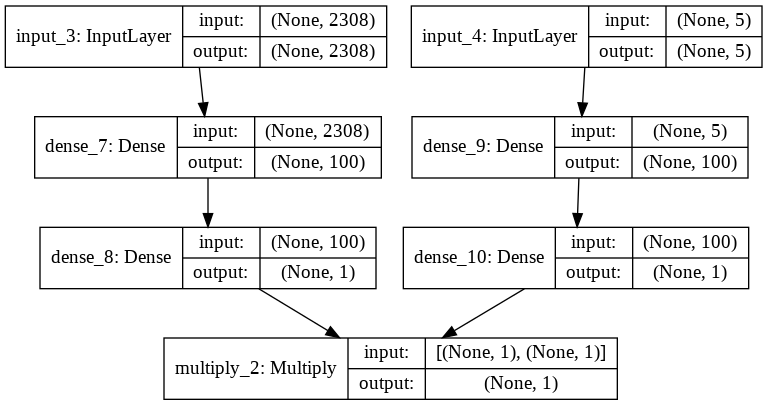

In [0]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [0]:
x1 = np.array(x)
x2 = np.array(vectorized_docs[5:])
y = np.array(y)

In [0]:
print(x1.shape, x2.shape, y.shape)

(2256, 5) (2256, 2308) (2256,)


In [0]:
X1_train = x1[:2100,:]
X2_train = x2[:2100, :]
y_train = y[:2100]

X1_test = x1[2100:,:]
X2_test = x2[2100:,:]
y_test = y[2100:]

In [0]:
print(X1_test.shape, X2_test.shape, y_test.shape)

(156, 5) (156, 2308) (156,)


In [0]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['acc'])

In [0]:
model.fit(x=[X2_train, X1_train], y=y_train, epochs=400,batch_size = 32, validation_data = ([X2_test, X1_test], y_test))